In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from sklearn.metrics import confusion_matrix,accuracy_score
import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Extract the data
!unzip '/content/drive/MyDrive/Real Time Face Emotion Recognition/Data.zip' -d '/content/drive/MyDrive/Real Time Face Emotion Recognition/'

In [2]:
train_data_dir='/content/drive/MyDrive/Real Time Face Emotion Recognition/Data/train'
validation_data_dir='/content/drive/MyDrive/Real Time Face Emotion Recognition/Data/test'

In [3]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:4]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(4, 4, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray')

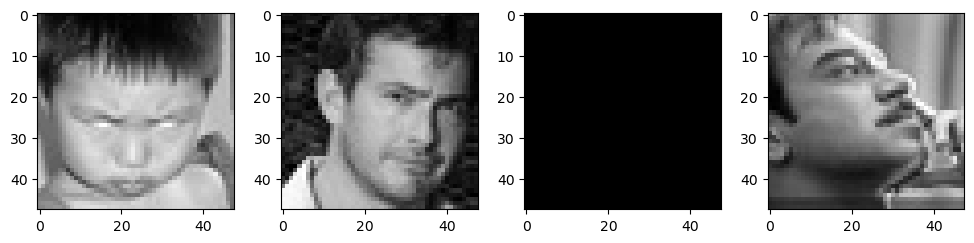

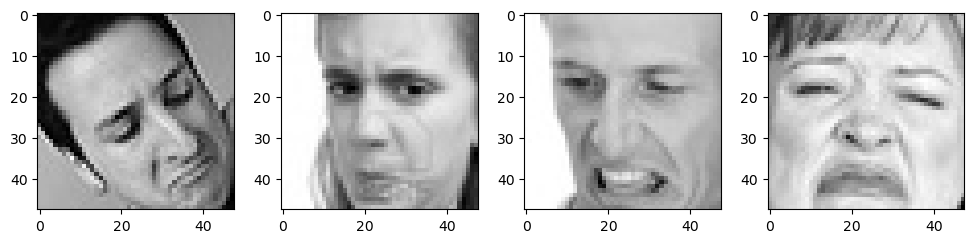

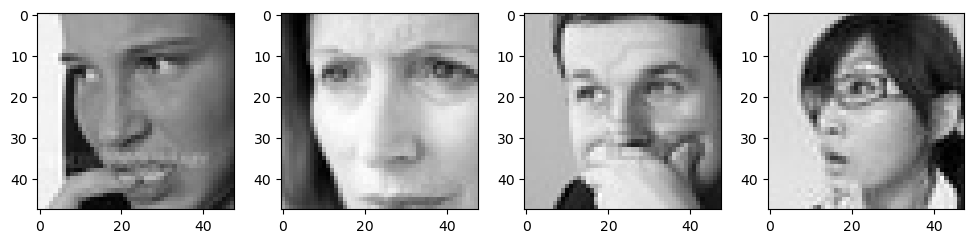

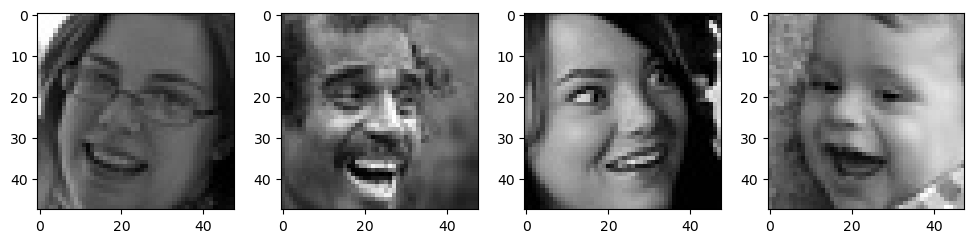

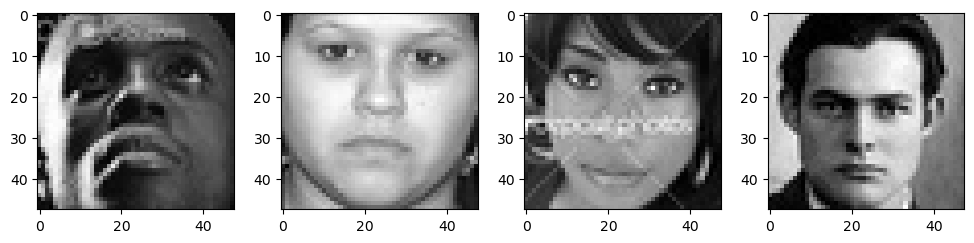

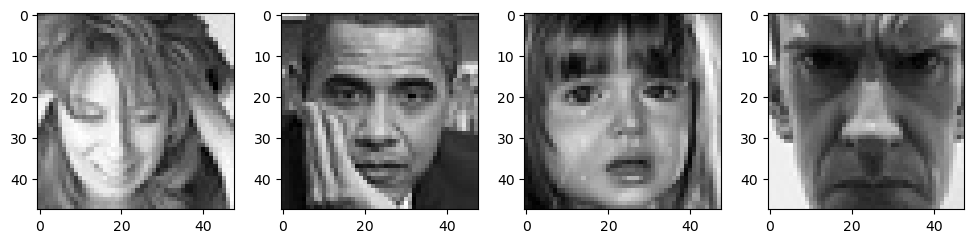

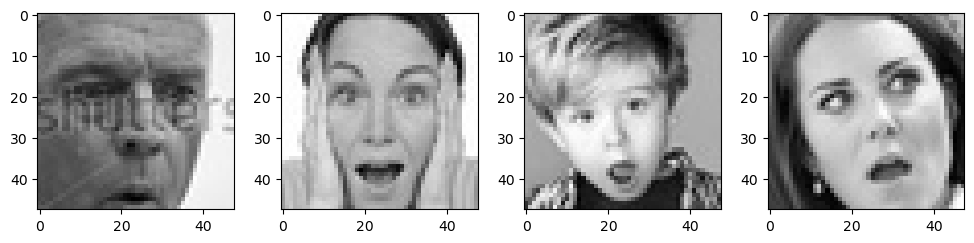

In [31]:
#angry class
plot_images(train_data_dir+'/angry')
#disgust class
plot_images(train_data_dir+'/disgust')
#fear class
plot_images(train_data_dir+'/fear')
#happy class
plot_images(train_data_dir+'/happy')
#neutral class
plot_images(train_data_dir+'/neutral')
#sad class
plot_images(train_data_dir+'/sad')
#surprise class
plot_images(train_data_dir+'/surprise')

In [5]:
# Creating Image generators, for all train, validation, and test set
training_gen=ImageDataGenerator(rescale=1./255)
testing_gen=ImageDataGenerator(rescale=1./255)

In [6]:
# Creating  Training Dataset
train_gen=training_gen.flow_from_directory(train_data_dir,                
                                           target_size=(48,48),
                                           batch_size=32,
                                           color_mode='grayscale',
                                           class_mode='categorical')

# Creating Test Set
test_gen=testing_gen.flow_from_directory(validation_data_dir,                                       
                                           target_size=(48,48),  
                                           batch_size=32,
                                           color_mode='grayscale',
                                           class_mode='categorical',
                                           shuffle= False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
####################
epochs = 48
no_of_classes = 7
learning_rate = 0.001
#####################


model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]



model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

 #fitting the model

results = model.fit_generator(generator=train_gen,
                                steps_per_epoch=train_gen.n//train_gen.batch_size,
                                epochs=40,
                                validation_data = test_gen,
                                validation_steps = test_gen.n//test_gen.batch_size,
                                callbacks=callbacks_list
                                )


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

C:\Users\Gaurav Gade\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
<ipython-input-7-17bc86dbcf0f>:90: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(generator=train_gen,


897/897 [==============================] - 437s 485ms/step - loss: 1.7067 - accuracy: 0.3419 - val_loss: 1.6115 - val_accuracy: 0.4203 - lr: 0.0010
Epoch 2/40
897/897 [==============================] - 436s 486ms/step - loss: 1.3591 - accuracy: 0.4778 - val_loss: 1.3799 - val_accuracy: 0.4602 - lr: 0.0010
Epoch 3/40
897/897 [==============================] - 438s 488ms/step - loss: 1.2467 - accuracy: 0.5248 - val_loss: 1.5956 - val_accuracy: 0.4379 - lr: 0.0010
Epoch 4/40
897/897 [==============================] - 432s 482ms/step - loss: 1.1776 - accuracy: 0.5536 - val_loss: 1.1640 - val_accuracy: 0.5594 - lr: 0.0010
Epoch 5/40
897/897 [==============================] - 442s 493ms/step - loss: 1.1254 - accuracy: 0.5744 - val_loss: 1.1730 - val_accuracy: 0.5466 - lr: 0.0010
Epoch 6/40
897/897 [==============================] - 509s 568ms/step - loss: 1.0713 - accuracy: 0.5948 - val_loss: 1.1417 - val_accuracy: 0.5671 - lr: 0.0010
Epoch 7/40
897/897 [==============================] - 444

### Our best model managed to obtain a accuracy of approximately 71% and val_accuracy of 62% on the dataset by running 40 epochs which is quite good.

### At each epoch, Keras checks if our model performed better than the models of the previous epochs.

In [13]:
# Predicting For Test Set
predictions=model.predict(test_gen)

# Printing Confution Matrix
cm=confusion_matrix(y_pred=np.argmax(predictions, axis=-1), y_true=test_gen.classes)                         
cm

array([[ 508,   14,   50,   29,  152,  190,   15],
       [  23,   64,    0,    3,    4,   16,    1],
       [  94,   12,  313,   27,  161,  330,   87],
       [  48,    1,   36, 1339,  206,  109,   35],
       [  64,    0,   27,   35,  830,  271,    6],
       [  93,    7,   54,   35,  275,  767,   16],
       [  24,    2,   52,   27,   55,   37,  634]], dtype=int64)

In [17]:
 # Accuracy Score of Our Model
acc=accuracy_score(y_pred=np.argmax(predictions, axis=-1),y_true=test_gen.classes)
acc       

0.6206464196154918

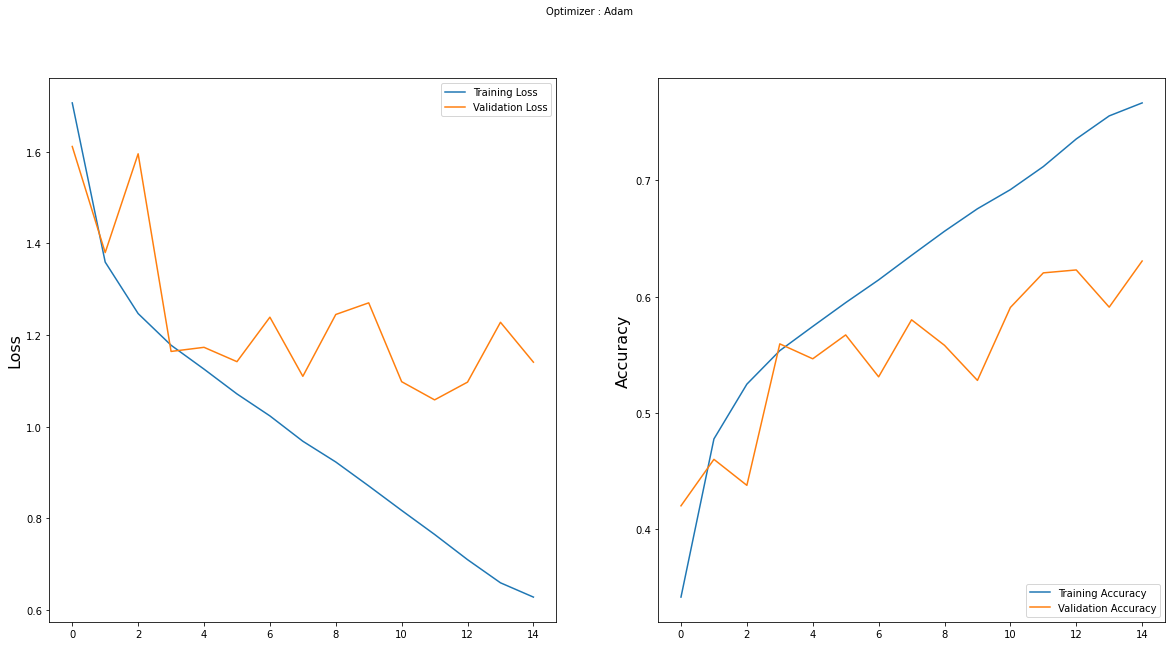

In [15]:
#Plotting Accuracy & Loss
# plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(results.history['loss'], label='Training Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(results.history['accuracy'], label='Training Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

### The training loss is slightly higher than the validation loss for the first epochs.

<ipython-input-30-f75820b90571>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(generator=test_gen)


<Figure size 640x480 with 0 Axes>

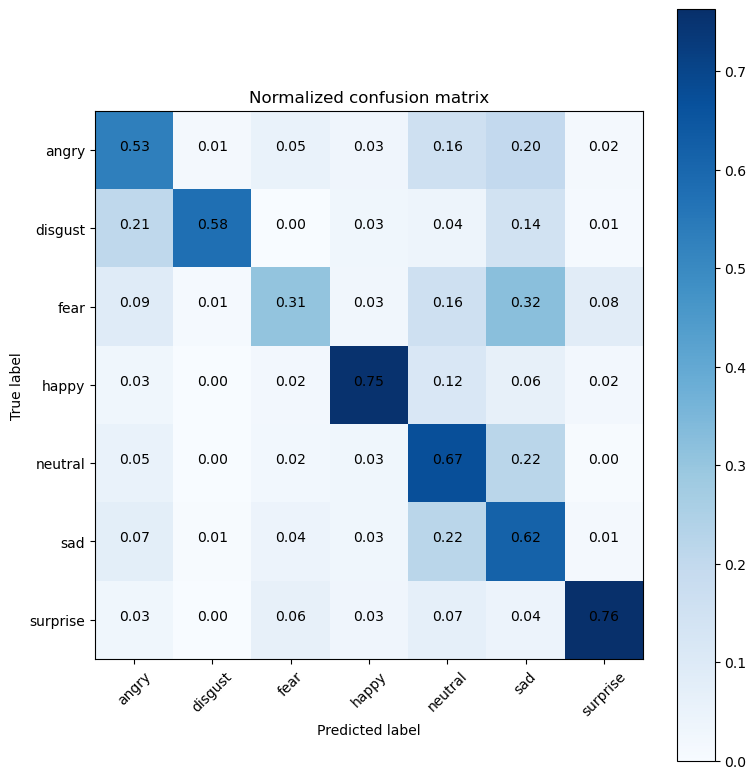

In [30]:
# show the confusion matrix of our predictions

# compute prediction
predictions = model.predict_generator(generator=test_gen)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_gen.classes
class_names = test_gen.class_indices.keys()
plt.style.use('default')

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 )

    plt.ylabel('True label')# **Live Class Monitoring System(Face Emotion Recognition)**
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

### Our model is very good for predicting happy and surprised faces. However it predicts quite poorly feared faces maybe because it confuses them with sad faces.

In [10]:
# Save the model
model.save('custom_model_result.h5')


### The training gave the accuracy of 71% and val_accuracy of 62%. It seems good. So, I save the model and detection I got from live video is good.

# Conclusion

### We trained the neural network and we achieved the highest validation accuracy of 62%.

### The application is able to detect face location and predict the right expression while checking it on a local webcam.

### The front-end of the model was made using streamlit for webapp and running well on local webapp link.

### Finally, we successfully deployed the Streamlit WebApp on Heroku and Streamlit that runs on a web server.

### Our Model can succesfully detect face and predict emotion on live video feed as well as on an image.